In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML/Project_ML/data.xlsx")
df1.head()

,STT,Tiêu đề tin,Chuyên mục,Nhu cầu,Tỉnh/Thành phố,Quận/Huyện,Phường/Xã,"Đường, khu vực",Người đăng,Điện thoại,Giá,Ngày đăng,Diện tích,Hướng,Số tầng,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Mô tả
0,1,Căn hộ Mặt tiền VÕ VĂN KIỆT-ĐỐI DIỆN TRẠM METR...,NaN,Cần bán,Hồ Chí Minh,Quận 8,Phường 16,"Đường Võ Văn Kiệt, Phường 16, Quận 8, Tp Hồ Ch...",Huy,845634568,"1,8 tỷ",13:57 19/05/2021,54.0,NaN,NaN,2.0,1.0,NaN,** DỰ ÁN CĂN HỘ VỊ TRÍ ĐẮC ĐỊA MẶT TIỀN VÕ VĂN...
1,2,Cc mới full nt An Hội 3 Quận Gò Vấp 76m² 2PN,NaN,Cần bán,Hồ Chí Minh,Quận Gò Vấp,Phường 14,"Đường 57, Phường 14, Quận Gò Vấp, Tp Hồ Chí Minh",Trần Tiến Dũng,903197167,"2,1 tỷ",12:56 19/05/2021,76.0,Bắc,NaN,2.0,2.0,Đang chờ sổ,"Căn hộ An Hội 3, Phường 14 quận\nGò Vấp. Căn 2..."
2,3,Chung cư Quận 6 61m² 2PN,NaN,Cần bán,Hồ Chí Minh,Quận 6,Phường 11,"chung cư starlight, Đường Nguyễn Văn Luông, Ph...",Mỹ ngân,767070672,"2,1 tỷ",12:55 19/05/2021,61.0,NaN,NaN,2.0,1.0,NaN,do nhu cầu dọn về quê cần để lại chung cư cao ...
3,4,Căn 2pn 2wc 75m2 có ban công. View gió mát,NaN,Cần bán,Hồ Chí Minh,Quận Bình Tân,Phường An Lạc,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Nguyễn Khánh Duyên,939022929,"2,6 tỷ",11:57 19/05/2021,75.0,NaN,NaN,2.0,2.0,NaN,Căn hộ 2pn nhận nhà quý 3/2021. Nhà có ban côn...
4,5,Bán studio 45m2 gác lửng 2PN 2.020tỷ cao thắng...,NaN,Cần bán,Hồ Chí Minh,Quận 10,Phường 12,"181, Đường Cao Thắng, Phường 12, Quận 10, Tp H...",hoàng,707066708,"2,02 tỷ",11:56 19/05/2021,45.0,NaN,NaN,2.0,1.0,NaN,cần bán căn studio 45m2 mặt tiền cao thắng Q10...


In [222]:
df1.shape

(14650, 19)

In [223]:
df1.columns

Index(['STT', 'Tiêu đề tin', 'Chuyên mục', 'Nhu cầu', 'Tỉnh/Thành phố',
       'Quận/Huyện', 'Phường/Xã', 'Đường, khu vực', 'Người đăng', 'Điện thoại',
       'Giá', 'Ngày đăng', 'Diện tích', 'Hướng', 'Số tầng', 'Số phòng',
       'Nhà vệ sinh', 'Giấy tờ pháp lý', 'Mô tả'],
      dtype='object')

In [224]:
df2 = df1[['Quận/Huyện', 'Diện tích', 'Số phòng', 'Nhà vệ sinh', 'Giấy tờ pháp lý', 'Giá']]
df2.head()

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,NaN,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,NaN,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,NaN,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,NaN,"2,02 tỷ"


In [225]:
df2.shape

(14650, 6)

In [226]:
print(df2['Quận/Huyện'].unique())
print(len(df2['Quận/Huyện'].unique()))

['Quận 8' 'Quận Gò Vấp' 'Quận 6' 'Quận Bình Tân' 'Quận 10'
 'Huyện Bình Chánh' 'Quận 2' 'Quận Bình Thạnh' 'Quận 9' 'Quận 12' 'Quận 7'
 'Quận Tân Phú' 'Quận Thủ Đức' 'Quận 11' 'Huyện Nhà Bè' 'Quận Phú Nhuận'
 'Quận Tân Bình' 'Quận 3' 'Quận 1' 'Quận 5' 'Quận 4' 'Huyện Hóc Môn'
 'Huyện Cần Giờ' 'Huyện Củ Chi' nan]
25


In [227]:
df2['Quận/Huyện'].value_counts()

Quận 7              1612
Quận 8              1499
Quận 9              1484
Quận Thủ Đức        1320
Quận Bình Tân       1177
Quận 2              1164
Quận Tân Phú        1094
Quận 12              743
Quận Bình Thạnh      693
Huyện Bình Chánh     616
Huyện Nhà Bè         530
Quận Tân Bình        447
Huyện Hóc Môn        352
Quận 4               321
Quận Phú Nhuận       318
Quận Gò Vấp          300
Quận 6               287
Quận 10              275
Quận 5               159
Quận 1               118
Quận 3                67
Quận 11               65
Huyện Củ Chi           3
Huyện Cần Giờ          2
Name: Quận/Huyện, dtype: int64

In [228]:
#Missing value
df2.isnull().sum()

Quận/Huyện            4
Diện tích             4
Số phòng             35
Nhà vệ sinh         867
Giấy tờ pháp lý    3954
Giá                   0
dtype: int64

In [229]:
df3 = df2.dropna(subset=['Quận/Huyện', 'Diện tích', 'Số phòng', 'Nhà vệ sinh']).reset_index(drop=True)
df3['Giấy tờ pháp lý'].fillna("Chưa có sổ", inplace = True)
df3

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
13770,Quận 6,64.0,2.0,2.0,Đang chờ bàn giao sổ,1.927.000.000 đ
13771,Quận 8,55.0,2.0,2.0,Đã có sổ đỏ/sổ hồng,1.508.000.000 đ
13772,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ bàn giao sổ,200.000.000 đ
13773,Quận 9,82.0,2.0,3.0,Đang chờ bàn giao sổ,1.300.000.000 đ


In [230]:
df3.isnull().sum()

Quận/Huyện         0
Diện tích          0
Số phòng           0
Nhà vệ sinh        0
Giấy tờ pháp lý    0
Giá                0
dtype: int64

In [231]:
df3['Giấy tờ pháp lý'].value_counts()

Đã có sổ                  3703
Đang chờ sổ               3449
Chưa có sổ                3316
Đang chờ bàn giao sổ      1308
Đã có sổ đỏ/sổ hồng       1049
Giấy tờ khác               824
Giấy tay, giấy tờ khác     126
Name: Giấy tờ pháp lý, dtype: int64

In [232]:
df3['Giấy tờ pháp lý'].replace({"Đang chờ bàn giao sổ": "Đang chờ sổ", "Đã có sổ đỏ/sổ hồng": "Đã có sổ"}, inplace=True)

df3['Giấy tờ pháp lý'].value_counts()

Đang chờ sổ               4757
Đã có sổ                  4752
Chưa có sổ                3316
Giấy tờ khác               824
Giấy tay, giấy tờ khác     126
Name: Giấy tờ pháp lý, dtype: int64

In [233]:
df4 = df3[df3['Giấy tờ pháp lý'].str.contains("Giấy tờ khác|Giấy tay, giấy tờ khác")==False].reset_index(drop=True)
df4['Giấy tờ pháp lý'].value_counts()

Đang chờ sổ    4757
Đã có sổ       4752
Chưa có sổ     3316
Name: Giấy tờ pháp lý, dtype: int64

In [234]:
df4

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
12820,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
12821,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
12822,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ
12823,Quận 9,82.0,2.0,3.0,Đang chờ sổ,1.300.000.000 đ


In [235]:
df4['Số phòng'].value_counts()

2.0     8597
1.0     2192
3.0     1853
4.0      128
5.0       38
6.0       10
8.0        3
10.0       3
7.0        1
Name: Số phòng, dtype: int64

In [236]:
df5 = df4[(df4['Số phòng'] == 1) | (df4['Số phòng'] == 2) | (df4['Số phòng'] == 3)].reset_index(drop=True)
df5

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
12637,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
12638,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
12639,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ
12640,Quận 9,82.0,2.0,3.0,Đang chờ sổ,1.300.000.000 đ


In [237]:
df5['Nhà vệ sinh'].value_counts()

2.0    8115
1.0    4199
3.0     297
4.0      30
6.0       1
Name: Nhà vệ sinh, dtype: int64

In [238]:
df6 = df5[(df5['Nhà vệ sinh'] == 1) | (df5['Nhà vệ sinh'] == 2)].reset_index(drop=True)
df6

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
12309,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700.000.000 đ
12310,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
12311,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
12312,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ


In [239]:
print(df6['Diện tích'].value_counts())
print(df6['Diện tích'].value_counts().unique())

65.000    587
70.000    467
50.000    397
68.000    389
60.000    376
         ... 
48.580      1
71.840      1
65.862      1
94.520      1
35.700      1
Name: Diện tích, Length: 509, dtype: int64
[587 467 397 389 376 365 342 310 298 278 274 264 261 237 231 223 215 212
 210 208 190 185 183 182 174 171 168 166 165 156 153 152 146 142 135 134
 127 122 109 108 103  99  97  96  95  92  90  78  77  76  74  66  62  61
  59  58  56  55  52  51  50  45  44  40  36  34  31  30  29  27  26  24
  23  22  18  17  16  15  14  12  11  10   9   8   7   6   5   4   3   2
   1]


In [240]:
df6['Diện tích'].value_counts().value_counts().head(10)

1     273
2      86
3      30
4       9
6       6
5       5
10      4
14      3
31      2
27      2
Name: Diện tích, dtype: int64

In [241]:
df7 = df6[df6['Diện tích'].map(df6['Diện tích'].value_counts()) > 50].reset_index(drop=True)
df7

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
10850,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700.000.000 đ
10851,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
10852,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
10853,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ


In [242]:
df7[df7['Giá'].str.contains("tỷ")]

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
8175,Quận Tân Phú,40.0,1.0,1.0,Đã có sổ,1 tỷ
8176,Quận Gò Vấp,84.0,2.0,2.0,Đã có sổ,"3,5 tỷ"
8178,Quận Tân Phú,53.0,1.0,1.0,Đang chờ sổ,"2,2 tỷ"
8179,Quận 7,70.0,2.0,2.0,Đang chờ sổ,"2,9 tỷ"


In [243]:
df7[df7['Giá'].str.contains("đ")]

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
2675,Quận 9,65.0,2.0,1.0,Đang chờ sổ,0 đ
8180,Quận Tân Phú,63.0,2.0,1.0,Chưa có sổ,2.800.000.000 đ
8181,Quận 7,54.0,1.0,1.0,Chưa có sổ,2.000.000.000 đ
8182,Quận 8,72.0,2.0,2.0,Đang chờ sổ,2.337.000.000 đ
8183,Quận Bình Tân,69.0,2.0,2.0,Đang chờ sổ,1.900.000.000 đ
...,...,...,...,...,...,...
10850,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700.000.000 đ
10851,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
10852,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
10853,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ


In [244]:
df7[df7['Giá'].str.contains("triệu")]

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
20,Quận 9,40.0,2.0,1.0,Đang chờ sổ,500 triệu
40,Quận 9,68.0,2.0,1.0,Đang chờ sổ,"2,64 triệu"
44,Quận Thủ Đức,65.0,2.0,1.0,Chưa có sổ,200 triệu
61,Huyện Bình Chánh,69.0,2.0,2.0,Chưa có sổ,450 triệu
63,Quận 9,75.0,2.0,2.0,Chưa có sổ,200 triệu
...,...,...,...,...,...,...
8151,Quận 8,63.0,2.0,1.0,Đã có sổ,700 triệu
8160,Huyện Hóc Môn,40.0,2.0,2.0,Đã có sổ,550 triệu
8164,Quận Thủ Đức,57.0,2.0,2.0,Đang chờ sổ,600 triệu
8177,Quận Bình Tân,45.0,1.0,1.0,Chưa có sổ,650 triệu


In [245]:
error_data = df7[df7['Giá'].str.contains("triệu")]
error_data = error_data[error_data['Giá'].str.contains(",")]
error_data

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
40,Quận 9,68.0,2.0,1.0,Đang chờ sổ,"2,64 triệu"
97,Quận 12,64.0,2.0,2.0,Đang chờ sổ,"2,18 triệu"
369,Huyện Nhà Bè,52.0,2.0,1.0,Đang chờ sổ,"6,5 triệu"
602,Quận 9,30.0,1.0,1.0,Chưa có sổ,"5,5 triệu"
649,Quận 8,65.0,2.0,2.0,Chưa có sổ,"2,09 triệu"
...,...,...,...,...,...,...
7137,Quận 9,72.0,2.0,2.0,Đang chờ sổ,"2,05 triệu"
7174,Quận 9,81.0,3.0,2.0,Đã có sổ,"975,57 triệu"
7214,Quận 8,70.0,2.0,2.0,Đã có sổ,"12,3 triệu"
7254,Quận 12,53.0,1.0,1.0,Đã có sổ,"4,50 triệu"


In [246]:
df8 = df7[~df7.isin(error_data)].dropna().reset_index(drop=True)
df8

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,"1,8 tỷ"
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,"2,1 tỷ"
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,"2,1 tỷ"
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,"2,6 tỷ"
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,"2,02 tỷ"
...,...,...,...,...,...,...
10774,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700.000.000 đ
10775,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927.000.000 đ
10776,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508.000.000 đ
10777,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,200.000.000 đ


In [247]:
def format_and_convert_price_to_num(x):
  if x.endswith('tỷ'):
    x = x.split()[0].replace(',', '.')
  elif x.endswith('triệu'):
    x = '0.' + x.split()[0]
  elif x.endswith('đ'):
    try:
      return float(x.split()[0].replace('.', '')) / 1000000000
    except:
      return None
  else:
    return None
  
  try:
    return float(x)
  except:
    return None

In [248]:
df8['Giá'] = df8['Giá'].apply(format_and_convert_price_to_num)

In [249]:
df8.isnull().sum()

Quận/Huyện         0
Diện tích          0
Số phòng           0
Nhà vệ sinh        0
Giấy tờ pháp lý    0
Giá                1
dtype: int64

In [250]:
df9 = df8.dropna().reset_index(drop=True)
df9

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,1.800
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,2.100
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,2.100
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,2.600
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,2.020
...,...,...,...,...,...,...
10773,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700
10774,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927
10775,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508
10776,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,0.200


In [251]:
df9['Giá'].sort_values().tail(20)

2410     10.00
8653     10.00
4166     10.00
4813     10.40
49       10.50
8961     11.00
50       11.00
1927     11.00
9153     11.50
9425     11.50
737      12.00
265      12.38
2301     12.50
2310     13.00
4731     14.00
430      17.25
2178     17.50
9506     25.00
1013     32.50
7625    880.00
Name: Giá, dtype: float64

In [252]:
df9.iloc[1013, :]

Quận/Huyện          Quận 11
Diện tích                75
Số phòng                  2
Nhà vệ sinh               1
Giấy tờ pháp lý    Đã có sổ
Giá                    32.5
Name: 1013, dtype: object

In [253]:
df9 = df9.drop([1013, 7625]).reset_index(drop=True)
df9

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,1.800
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,2.100
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,2.100
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,2.600
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,2.020
...,...,...,...,...,...,...
10771,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700
10772,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927
10773,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508
10774,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,0.200


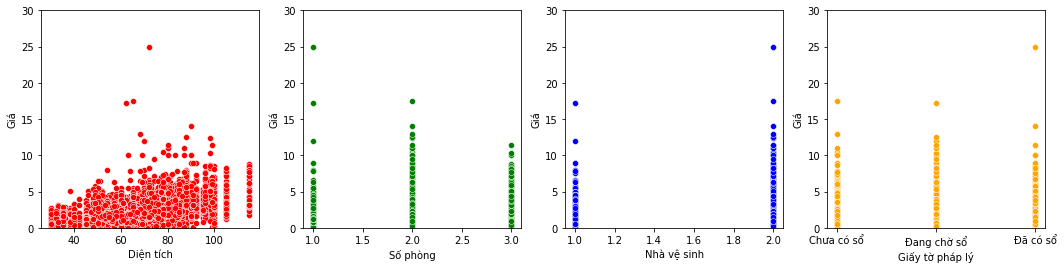

In [254]:
fig, axs = plt.subplots(ncols=4, figsize=(18,4))

for i in range(len(axs)):
    axs[i].set_ylim([0, 30.0])

_ = sns.scatterplot(x=df9['Diện tích'], y=df9['Giá'], ax=axs[0], color='r')

_ = sns.scatterplot(x=df9['Số phòng'], y=df9['Giá'], ax=axs[1], color='g')

_ = sns.scatterplot(x=df9['Nhà vệ sinh'], y=df9['Giá'], ax=axs[2], color='b')

_ = sns.scatterplot(x=df9['Giấy tờ pháp lý'], y=df9['Giá'], ax=axs[3], color='orange')

plt.show()

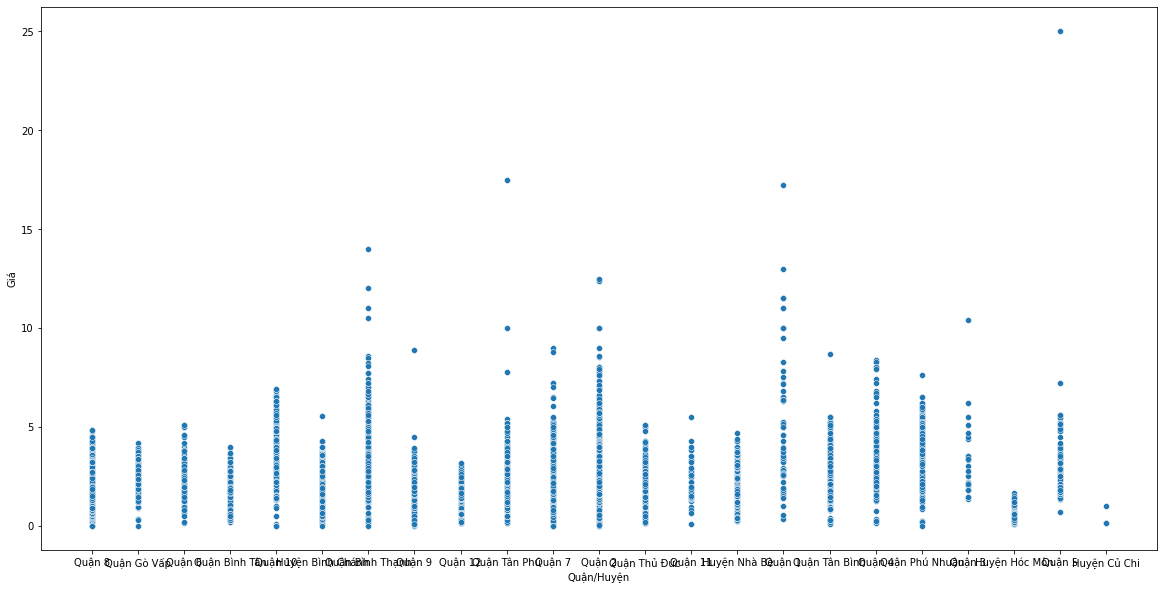

In [255]:
sns.scatterplot(x=df9['Quận/Huyện'], y=df9['Giá'])

In [256]:
df9['Quận/Huyện'].unique()

array(['Quận 8', 'Quận Gò Vấp', 'Quận 6', 'Quận Bình Tân', 'Quận 10',
       'Huyện Bình Chánh', 'Quận Bình Thạnh', 'Quận 9', 'Quận 12',
       'Quận Tân Phú', 'Quận 7', 'Quận 2', 'Quận Thủ Đức', 'Quận 11',
       'Huyện Nhà Bè', 'Quận 1', 'Quận Tân Bình', 'Quận 4',
       'Quận Phú Nhuận', 'Quận 3', 'Huyện Hóc Môn', 'Quận 5',
       'Huyện Củ Chi'], dtype=object)

In [257]:
df10 = df9.copy()
df10['Giá/m2'] = round(df10['Giá']*1000 / df10['Diện tích'])
df10

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá,Giá/m2
0,Quận 8,54.0,2.0,1.0,Chưa có sổ,1.800,33.0
1,Quận Gò Vấp,76.0,2.0,2.0,Đang chờ sổ,2.100,28.0
2,Quận 6,61.0,2.0,1.0,Chưa có sổ,2.100,34.0
3,Quận Bình Tân,75.0,2.0,2.0,Chưa có sổ,2.600,35.0
4,Quận 10,45.0,2.0,1.0,Chưa có sổ,2.020,45.0
...,...,...,...,...,...,...,...
10771,Quận 4,50.0,1.0,1.0,Đang chờ sổ,2.700,54.0
10772,Quận 6,64.0,2.0,2.0,Đang chờ sổ,1.927,30.0
10773,Quận 8,55.0,2.0,2.0,Đã có sổ,1.508,27.0
10774,Quận Thủ Đức,75.0,2.0,2.0,Đang chờ sổ,0.200,3.0


In [258]:
df10['Giá/m2'].describe()

count    10776.000000
mean        34.252877
std         16.504550
min          0.000000
25%         25.000000
50%         32.000000
75%         41.000000
max        347.000000
Name: Giá/m2, dtype: float64

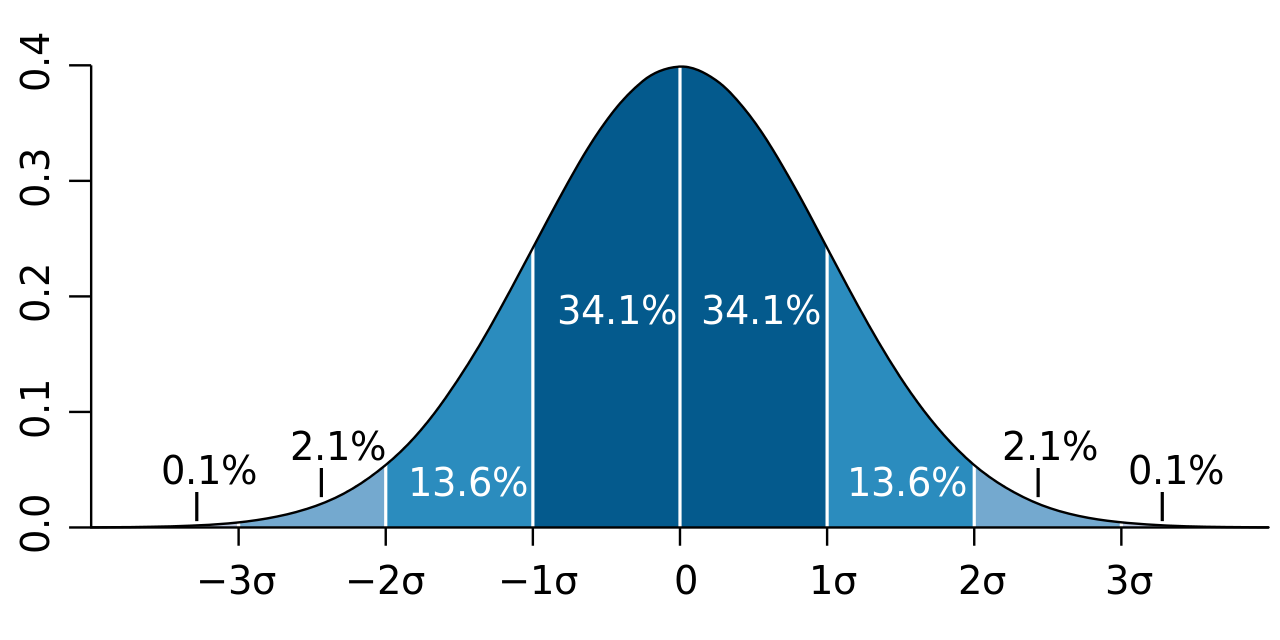

In [259]:
def remove_gia_per_m2_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('Quận/Huyện'):
    m = np.mean(subdf['Giá/m2'])
    st = np.std(subdf['Giá/m2'])
    reduced_df = subdf[(subdf['Giá/m2'] <= (m + st)) & (subdf['Giá/m2'] > (m - st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True) 
  return df_out

In [260]:
df11 = remove_gia_per_m2_outliers(df10)
df11.shape

(8159, 7)

In [261]:
df11['Giá/m2'].describe()

count    8159.000000
mean       34.502145
std        12.415578
min         4.000000
25%        27.000000
50%        32.000000
75%        40.000000
max       120.000000
Name: Giá/m2, dtype: float64

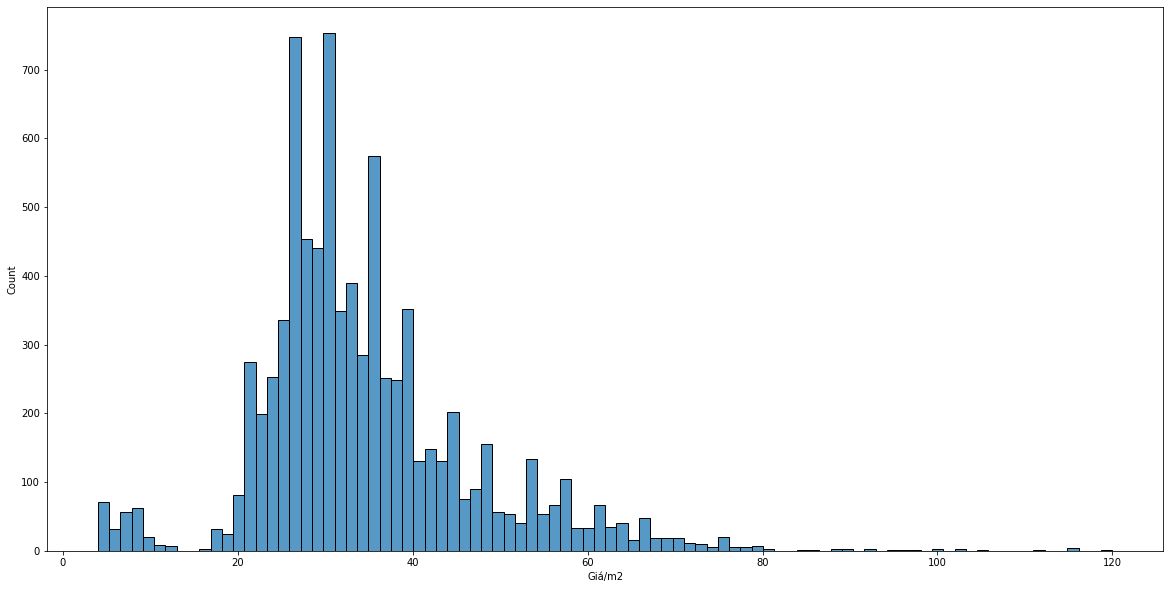

In [262]:
sns.histplot(df11['Giá/m2'])

In [263]:
df12 = df11.drop('Giá/m2', axis='columns')
df12

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá
0,Huyện Bình Chánh,78.0,2.0,2.0,Đang chờ sổ,2.90
1,Huyện Bình Chánh,72.0,2.0,2.0,Đã có sổ,2.75
2,Huyện Bình Chánh,92.0,2.0,2.0,Đã có sổ,2.50
3,Huyện Bình Chánh,56.0,2.0,1.0,Đang chờ sổ,2.27
4,Huyện Bình Chánh,54.0,2.0,1.0,Đang chờ sổ,1.75
...,...,...,...,...,...,...
8154,Quận Tân Phú,70.0,2.0,2.0,Đã có sổ,1.70
8155,Quận Tân Phú,65.0,2.0,2.0,Đang chờ sổ,3.20
8156,Quận Tân Phú,65.0,2.0,2.0,Đang chờ sổ,2.87
8157,Quận Tân Phú,91.0,3.0,2.0,Đang chờ sổ,3.20


In [264]:
location_dummies = pd.get_dummies(df12['Quận/Huyện'])
status_dummies = pd.get_dummies(df12['Giấy tờ pháp lý'])

In [265]:
location_dummies

,Huyện Bình Chánh,Huyện Củ Chi,Huyện Hóc Môn,Huyện Nhà Bè,Quận 1,Quận 10,Quận 11,Quận 12,Quận 2,Quận 3,Quận 4,Quận 5,Quận 6,Quận 7,Quận 8,Quận 9,Quận Bình Thạnh,Quận Bình Tân,Quận Gò Vấp,Quận Phú Nhuận,Quận Thủ Đức,Quận Tân Bình,Quận Tân Phú
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [266]:
status_dummies

,Chưa có sổ,Đang chờ sổ,Đã có sổ
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
8154,0,0,1
8155,0,1,0
8156,0,1,0
8157,0,1,0


In [267]:
df13 = pd.concat([df12, location_dummies, status_dummies], axis='columns')
df13

,Quận/Huyện,Diện tích,Số phòng,Nhà vệ sinh,Giấy tờ pháp lý,Giá,Huyện Bình Chánh,Huyện Củ Chi,Huyện Hóc Môn,Huyện Nhà Bè,Quận 1,Quận 10,Quận 11,Quận 12,Quận 2,Quận 3,Quận 4,Quận 5,Quận 6,Quận 7,Quận 8,Quận 9,Quận Bình Thạnh,Quận Bình Tân,Quận Gò Vấp,Quận Phú Nhuận,Quận Thủ Đức,Quận Tân Bình,Quận Tân Phú,Chưa có sổ,Đang chờ sổ,Đã có sổ
0,Huyện Bình Chánh,78.0,2.0,2.0,Đang chờ sổ,2.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Huyện Bình Chánh,72.0,2.0,2.0,Đã có sổ,2.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Huyện Bình Chánh,92.0,2.0,2.0,Đã có sổ,2.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Huyện Bình Chánh,56.0,2.0,1.0,Đang chờ sổ,2.27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Huyện Bình Chánh,54.0,2.0,1.0,Đang chờ sổ,1.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,Quận Tân Phú,70.0,2.0,2.0,Đã có sổ,1.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8155,Quận Tân Phú,65.0,2.0,2.0,Đang chờ sổ,3.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8156,Quận Tân Phú,65.0,2.0,2.0,Đang chờ sổ,2.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8157,Quận Tân Phú,91.0,3.0,2.0,Đang chờ sổ,3.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [268]:
df14 = df13.drop(['Quận/Huyện', 'Giấy tờ pháp lý'], axis='columns')
df14

,Diện tích,Số phòng,Nhà vệ sinh,Giá,Huyện Bình Chánh,Huyện Củ Chi,Huyện Hóc Môn,Huyện Nhà Bè,Quận 1,Quận 10,Quận 11,Quận 12,Quận 2,Quận 3,Quận 4,Quận 5,Quận 6,Quận 7,Quận 8,Quận 9,Quận Bình Thạnh,Quận Bình Tân,Quận Gò Vấp,Quận Phú Nhuận,Quận Thủ Đức,Quận Tân Bình,Quận Tân Phú,Chưa có sổ,Đang chờ sổ,Đã có sổ
0,78.0,2.0,2.0,2.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,72.0,2.0,2.0,2.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,92.0,2.0,2.0,2.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,56.0,2.0,1.0,2.27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,54.0,2.0,1.0,1.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,70.0,2.0,2.0,1.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8155,65.0,2.0,2.0,3.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8156,65.0,2.0,2.0,2.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8157,91.0,3.0,2.0,3.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [269]:
X = df14.drop('Giá', axis='columns')
X

,Diện tích,Số phòng,Nhà vệ sinh,Huyện Bình Chánh,Huyện Củ Chi,Huyện Hóc Môn,Huyện Nhà Bè,Quận 1,Quận 10,Quận 11,Quận 12,Quận 2,Quận 3,Quận 4,Quận 5,Quận 6,Quận 7,Quận 8,Quận 9,Quận Bình Thạnh,Quận Bình Tân,Quận Gò Vấp,Quận Phú Nhuận,Quận Thủ Đức,Quận Tân Bình,Quận Tân Phú,Chưa có sổ,Đang chờ sổ,Đã có sổ
0,78.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,72.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,92.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,56.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,54.0,2.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,70.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8155,65.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8156,65.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
8157,91.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [270]:
y = df14['Giá']
y

0       2.90
1       2.75
2       2.50
3       2.27
4       1.75
        ... 
8154    1.70
8155    3.20
8156    2.87
8157    3.20
8158    3.20
Name: Giá, Length: 8159, dtype: float64

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [272]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score

def find_best_model(X, y):
  algos = {
      'linear regression': {
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
          }
      },

      'lasso': {
          'model': Lasso(),
          'params': {
              'alpha': [1, 2],
              'selection': ['random', 'cyclic']
          }
      },

      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion': ['mse', 'friedman_mse'],
              'splitter': ['best', 'random']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_,
    })

  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [273]:
df = find_best_model(X, y)
df

,model,best_score,best_params
0,linear regression,0.775401,{'normalize': False}
1,lasso,0.409829,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.797552,"{'criterion': 'mse', 'splitter': 'random'}"


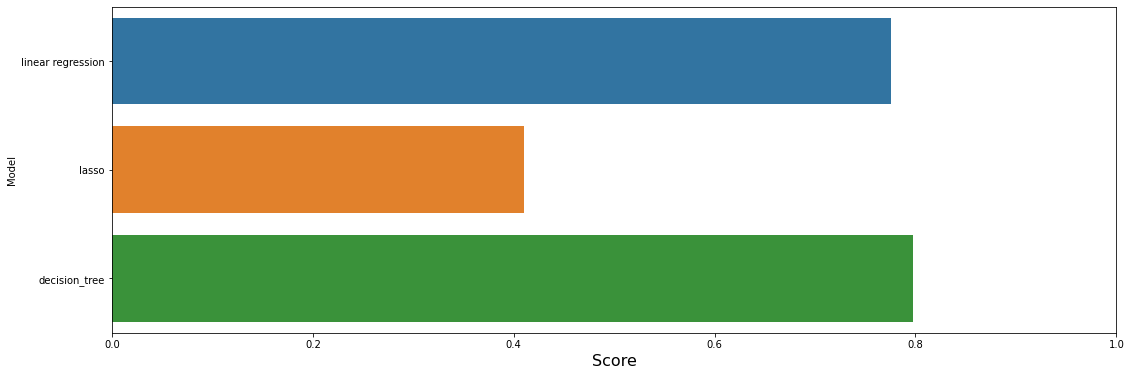

In [274]:
f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='best_score', y='model', data = df)
axe.set_xlabel('Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

In [275]:
model = DecisionTreeRegressor(criterion='mse', splitter='random')

In [276]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [277]:
model.score(X_test, y_test)

0.7801232203168549

In [278]:
def predict_price(vitri, dientich, sophong, wc, giayto):
  loc_index_vitri = np.where(X.columns == vitri)[0][0]
  loc_index_giayto = np.where(X.columns == giayto)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = dientich
  x[1] = sophong
  x[2] = wc
  if loc_index_vitri >=0 & loc_index_giayto >=0:
    x[loc_index_vitri] = 1
    x[loc_index_giayto] = 1

  return model.predict([x])[0]

In [279]:
predict_price('Quận 7', 57, 2, 1, 'Chưa có sổ')

2.625

In [280]:
predict_price('Quận 7', 102, 3, 2, 'Đã có sổ')

3.675

In [281]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as pl

def ModelLearning(X, y):
    
    
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    cv.get_n_splits(X)

    
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    
    fig = pl.figure(figsize=(10,7))

    
    for k, depth in enumerate([1,3,6,10]):
        
        
        regressor = DecisionTreeRegressor(max_depth = depth)

        
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    
    
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
    cv.get_n_splits(X)

    
    max_depth = np.arange(1,11)

    
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

   
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

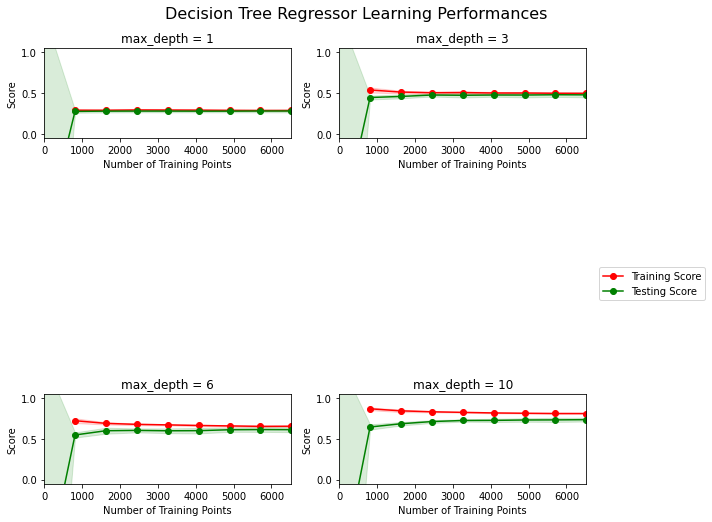

In [282]:
ModelLearning(X, y)

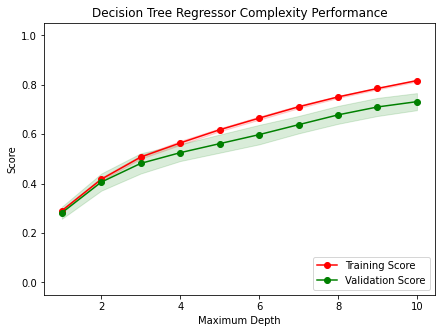

In [283]:
ModelComplexity(X_train, y_train)

In [284]:
from sklearn.metrics import scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    cv_sets.get_n_splits(X)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

In [285]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [286]:
reg = fit_model(X, y)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.best_estimator_.get_params()['max_depth']))
print("Best Score is {:.2f}".format(reg.best_score_))

Parameter 'max_depth' is 10 for the optimal model.
Best Score is 0.74


In [287]:
reg.score(X_test, y_test)

0.8068559494582201

In [293]:
# import pickle
# with open("HCMCity_Home_Prices_Model.pickle", 'wb') as f:
#   pickle.dump(model, f)
from joblib import dump, load
with open("HCMCity_Home_Prices_Model.joblib", 'wb') as f:
  dump(model, f) 

In [289]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))

In [290]:
X.columns

Index(['Diện tích', 'Số phòng', 'Nhà vệ sinh', 'Huyện Bình Chánh',
       'Huyện Củ Chi', 'Huyện Hóc Môn', 'Huyện Nhà Bè', 'Quận 1', 'Quận 10',
       'Quận 11', 'Quận 12', 'Quận 2', 'Quận 3', 'Quận 4', 'Quận 5', 'Quận 6',
       'Quận 7', 'Quận 8', 'Quận 9', 'Quận Bình Thạnh', 'Quận Bình Tân',
       'Quận Gò Vấp', 'Quận Phú Nhuận', 'Quận Thủ Đức', 'Quận Tân Bình',
       'Quận Tân Phú', 'Chưa có sổ', 'Đang chờ sổ', 'Đã có sổ'],
      dtype='object')

In [ ]:
print()